<a href="https://colab.research.google.com/github/ob3dd/Adult-Income-and-Wine-Quality-/blob/main/Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Imports**

In [123]:
# Import Panda
import pandas as pd
# Import Numpy
import numpy as np
# Import Matplotlib
import matplotlib.pyplot as plt
# Import Seaborn
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##**Load Data**

In [124]:
fpath = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/adult.csv'
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


##**Clean the Data**

###**Dropping Unnecessary Columns**

In [125]:
# Drop columns
columns_to_drop = ['fnlwgt', 'capital-loss', 'capital-loss', 'marital-status', 'race', 'educational-num']
df.drop(columns_to_drop, axis=1, inplace=True)

These columns aren't relevant to our data, so they will be dropped.

###**Removing Duplicates**

In [126]:
# Check for dulplicates
df.duplicated().sum()
print (f"There are {df.duplicated().sum()} duplicates in the dataset")

There are 9076 duplicates in the dataset


In [127]:
# Dropping Duplicates
df.drop_duplicates(inplace=True)

In [128]:
# Check for dulplicates
df.duplicated().sum()
print (f"There are {df.duplicated().sum()} duplicates in the dataset")

There are 0 duplicates in the dataset


###**Handling Missing Values**

In [129]:
# Checking for missing values
df.isna().sum()

age               0
workclass         0
education         0
occupation        0
relationship      0
gender            0
capital-gain      0
hours-per-week    0
native-country    0
income            0
dtype: int64

There are 0 missing values

## **Fixing Inconsistencies**

In [130]:
# Viewing all data types
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['workclass', 'education', 'occupation', 'relationship', 'gender',
       'native-country', 'income'],
      dtype='object')

In [131]:
# creating a for loop that loops through my string column
for col in str_cols:
  print(f"- Column = {col}")
  print(df[col].value_counts(dropna=False))
  print('\n\n')

- Column = workclass
Private             25976
Self-emp-not-inc     3690
Local-gov            2905
?                    2289
State-gov            1889
Self-emp-inc         1632
Federal-gov          1354
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64



- Column = education
HS-grad         11593
Some-college     8530
Bachelors        6600
Masters          2408
Assoc-voc        1901
Assoc-acdm       1540
11th             1527
10th             1231
7th-8th           915
Prof-school       796
9th               731
12th              605
Doctorate         570
5th-6th           497
1st-4th           241
Preschool          81
Name: education, dtype: int64



- Column = occupation
Prof-specialty       5448
Exec-managerial      5141
Sales                4480
Adm-clerical         4317
Craft-repair         4315
Other-service        4067
?                    2299
Machine-op-inspct    2235
Transport-moving     1955
Handlers-cleaners    1606
Farming-fishing      141

I have no knowledge of this company or the dataset, so I don't know what "?" signifies or is suppose to signify. We won't try to fix those.

In [132]:
# checking for inconsistent numeric features
df.describe()

,age,capital-gain,hours-per-week
count,39766.000000,39766.000000,39766.000000
mean,39.754313,1309.128351,40.715662
std,13.895102,8189.799545,13.186021
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,38.000000
50%,38.000000,0.000000,40.000000
75%,49.000000,0.000000,45.000000
max,90.000000,99999.000000,99.000000


In [133]:
# checking for inconsistent categorical features
df.describe(exclude= 'number')

,workclass,education,occupation,relationship,gender,native-country,income
count,39766,39766,39766,39766,39766,39766,39766
unique,9,16,15,6,2,42,2
top,Private,HS-grad,Prof-specialty,Husband,Male,United-States,<=50K
freq,25976,11593,5448,15893,26425,34805,29746


##**Visualizations**

###**Using Univariate Exploratory Visualizations for all features**

###**Catergorical Columns**

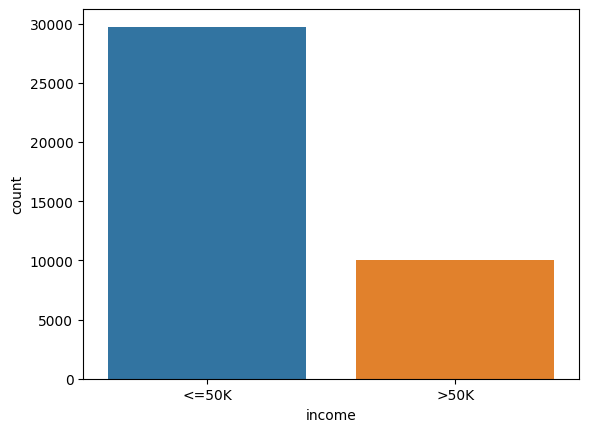

In [134]:
sns.countplot(data = df, x = 'income');

- Most individuals make less than 50K.

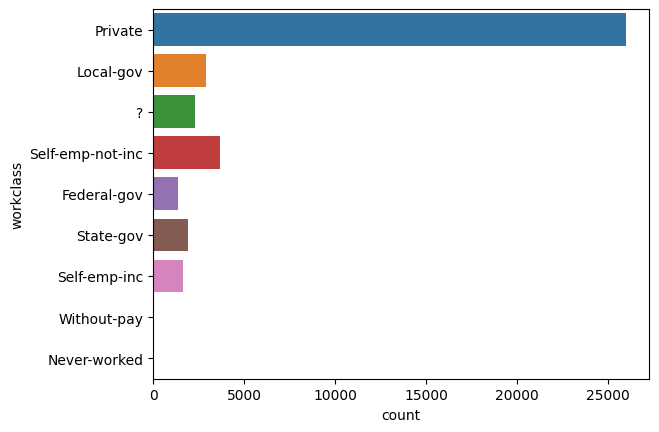

In [135]:
sns.countplot(data = df, y = 'workclass');

- Most individuals are private earners. Their incomes generated from any type of occupational activities or any income that is received apart from salary or any type of commission.
- Self Employed, Those paid by the local govt are the next top individual wuth high incomes
- The least are those whose income are from the Federal Govt

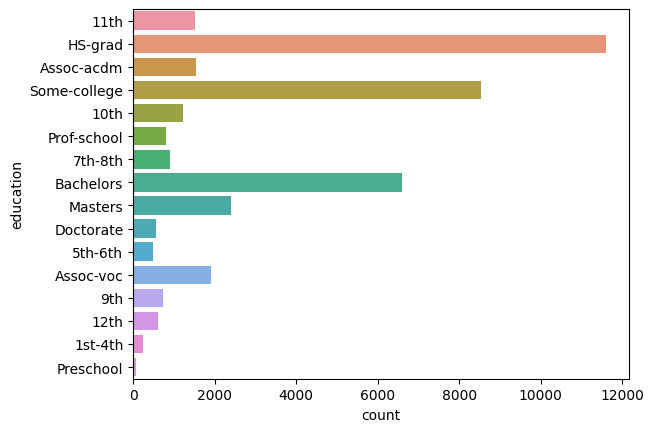

In [136]:
sns.countplot(data = df, y = 'education');

- High School Graduates are the highest with incomes coming into their pocket
- Preschool is the least

NB: This isn't a chart of those with the most money, it just gives a visual representation of the amount of individuals having incomes.

- Most individuals with incomes are married


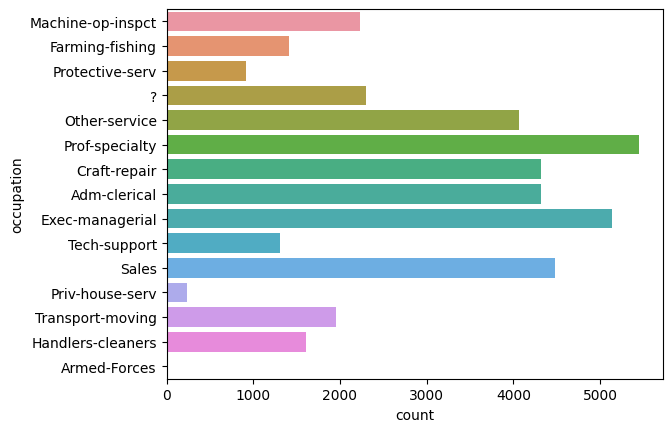

In [137]:
sns.countplot(data = df, y = 'occupation');

- Occupations most individuals covered were the ones with specialities
- The least was a Private house server.

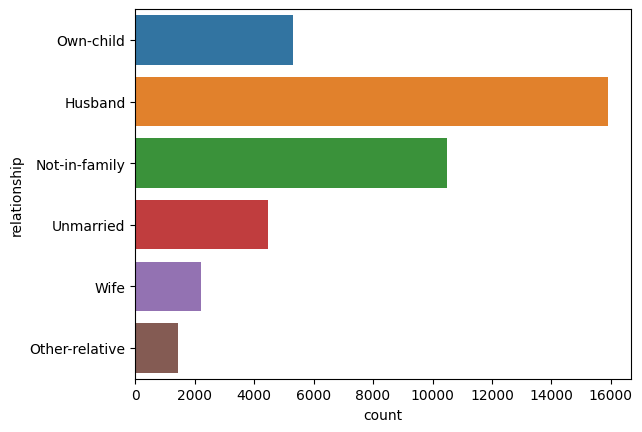

In [138]:
sns.countplot(data = df, y = 'relationship');

- The most relationship status of individuals who have incomes are known to be husbands.
- Wives(excluding "Others") were the least ones to have incomes in a household.

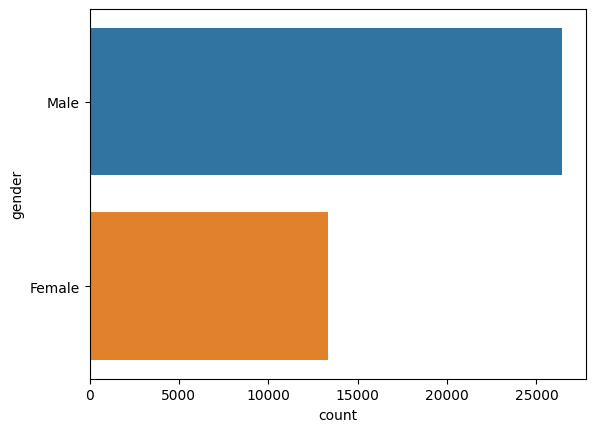

In [139]:
sns.countplot(data = df, y = 'gender');

- As seen in the chart above, Males are the genders to have incomes between both genders

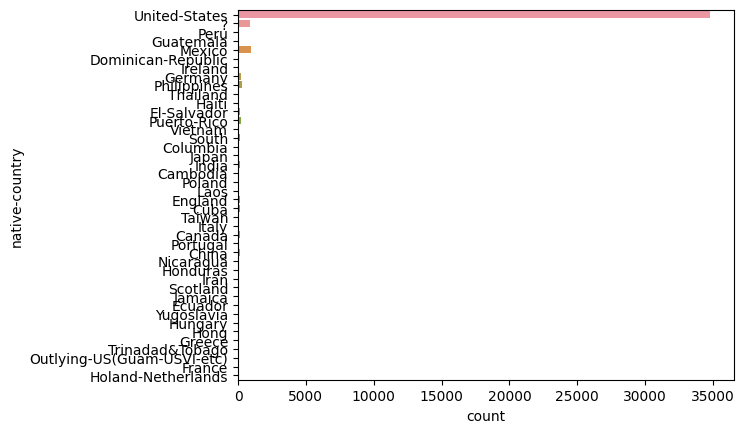

In [140]:
sns.countplot(data = df, y = 'native-country');

- Most of these individuals were from the USA.

###**Numerical Column**

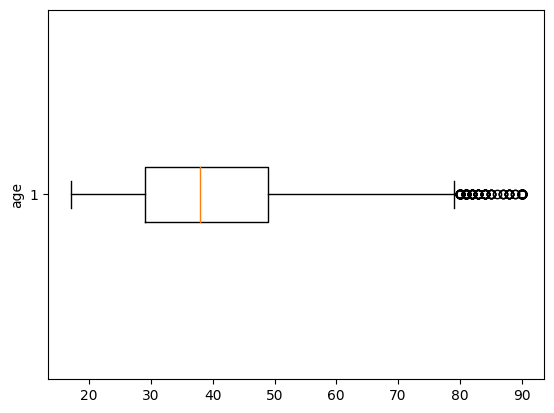

In [141]:
# making the boxplot
fig, ax = plt.subplots()
ax.boxplot(df['age'], vert = False);
ax.set_ylabel("age");

Most of the individuals were from the age 80-90.

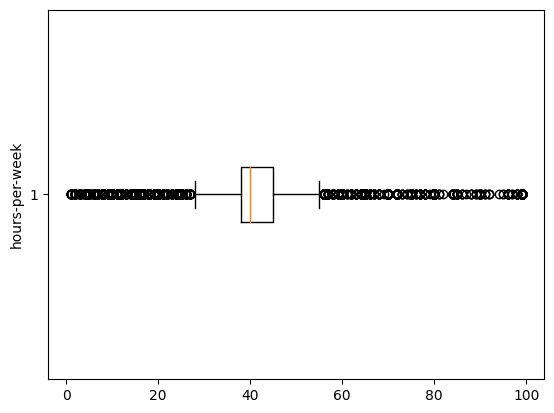

In [142]:
# making the boxplot
fig, ax = plt.subplots()
ax.boxplot(df['hours-per-week'], vert = False);
ax.set_ylabel("hours-per-week");

Most individuals put in over 40 hours every week.